In [ ]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Uninstalling scikit-learn-0.24.2:
  Successfully uninstalled scikit-learn-0.24.2
  Using cached https://files.pythonhosted.org/packages/a8/eb/a48f25c967526b66d5f1fa7a984594f0bf0a5afafa94a8c4dbc317744620/scikit_learn-0.24.2-cp37-cp37m-manylinux2010_x86_64.whl


In [ ]:
import numpy as np 
import sklearn as sk
from sklearn import datasets
from sklearn import metrics
from sklearn import svm
from sklearn import linear_model
from sklearn import cluster
from sklearn import model_selection
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ARDRegression
from sklearn.linear_model import SGDRegressor, PoissonRegressor, TweedieRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVR, SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
#from sklearn.linear_model import TweedieRegressor, PoissonRegressor, GammaRegressor
from sklearn.model_selection import validation_curve
from sklearn.decomposition import PCA, FastICA, fastica
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_regression
import seaborn as sns

In [ ]:
the_real_one = pd.read_csv('THE_REAL_ONE_SCALED.csv')
X_test = pd.read_csv('X_SCALED_TEST.csv')
X_train = pd.read_csv('X_SCALED_TRAIN.csv')
y_test = pd.read_csv('THE_REAL_ONE_Y_TEST_REGRESSION.csv')
y_train = pd.read_csv('THE_REAL_ONE_Y_TRAIN_REGRESSION.csv')
y_full = pd.read_csv("THE_REAL_ONE_Y_REGRESSION.csv")
#y_test = y_test.squeeze()
#y_train = y_train.squeeze()

rvalues = []
mae = []
mape = []
names = []

In [ ]:
the_real_one = the_real_one.drop(['score', 'rounded_score', 'sextile_score', 'tripartite_score'], axis=1)
the_real_one


,popularity,total_tracks,album_duration_minutes,year,min_loudness,max_loudness,mean_loudness,stddev_loudness,label_frequency,mean_duration,min_valence,max_valence,stddev_valence,mean_valence,weighted_avg_valence,weighted_avg_speechiness,med_liveness,stddev_liveness,stddev_instrumentalness,weighted_avg_instrumentalness,explicit,weighted_avg_energy,min_danceability,max_danceability,mean_danceability,stddev_danceability,mean_acousticness,stddev_acousticness,med_acousticness,min_popularity,max_popularity,mean_popularity,stddev_popularity,key_0_pct,key_1_pct,key_2_pct,key_3_pct,key_4_pct,key_5_pct,key_6_pct,...,sig_5_pct,num_artists,num_features,artist_popularity_mean,artist_followers_mean,artist_popularity_min,artist_popularity_max,artist_followers_min,artist_followers_max,artist_popularity_stddev,artist_followers_stddev,mean_feat_artist_popularity,mean_feat_artist_followers,min_feat_artist_popularity,min_feat_artist_followers,max_feat_artist_popularity,max_feat_artist_followers,stddev_feat_artist_popularity,stddev_feat_artist_followers,genre_0_pct,genre_1_pct,genre_2_pct,genre_3_pct,genre_4_pct,genre_5_pct,genre_6_pct,genre_7_pct,genre_8_pct,genre_9_pct,genre_10_pct,genre_11_pct,genre_12_pct,genre_13_pct,genre_14_pct,genre_15_pct,genre_16_pct,genre_17_pct,genre_18_pct,genre_19_pct,genre_20_pct
0,25,0.037383,0.050448,1.000000,8.695784,77.746616,71.966860,2.468588,0.000000,0.057872,52.09,55.6,15.025998,18.476000,16.069549,3.524631,9.575,5.812945,30.604008,22.075199,0.0,22.089854,39.40,63.3,45.330000,10.642582,76.730000,76.730000,81.6500,10,17,12.800000,2.699794,0.000000,0.000000,30.000000,0.000000,20.000000,0.000000,0.000000,...,0.000000,0.0,0.057692,18.0,6.289716,18,18,6.289716,6.289716,0.0,0.0,24.000000,7.482682,24.0,7.482682,24.0,7.482682,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,10.000000,0.000000,0.000000,10.000000,0.000000,40.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,10.000000,0.000000
1,69,0.070093,0.073504,1.000000,5.087701,81.197035,78.453161,1.668215,0.003650,0.047095,75.31,82.5,20.156995,43.517059,43.974797,26.145333,11.200,10.004012,0.001001,0.000364,100.0,55.135105,45.40,87.3,75.317647,12.166976,12.456412,12.456412,6.9500,33,72,40.941176,8.989373,11.764706,41.176471,5.882353,0.000000,5.882353,0.000000,5.882353,...,0.000000,0.0,0.288462,69.0,11.990569,69,69,11.990569,11.990569,0.0,0.0,53.230769,15.280879,25.0,3.218876,99.0,17.815850,20.753128,2.863981,0.000000,94.117647,0.000000,5.882353,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,44,0.233645,0.310125,1.000000,27.651865,77.851220,67.206191,7.829765,0.072993,0.066995,83.92,87.1,21.225589,29.830000,28.973155,9.620623,11.250,13.873995,32.165156,68.565822,0.0,31.134999,72.37,81.6,44.774600,19.179167,84.409600,84.409600,93.0000,13,34,18.960000,4.936164,13.461538,5.769231,3.846154,5.769231,9.615385,9.615385,1.923077,...,5.769231,0.0,0.076923,50.0,9.708324,50,50,9.708324,9.708324,0.0,0.0,33.000000,7.891518,25.0,6.745236,41.0,8.411610,11.313708,2.181098,0.000000,3.846154,3.846154,5.769231,9.615385,3.846154,7.692308,5.769231,1.923077,7.692308,0.0,1.923077,0.000000,1.923077,15.384615,0.000000,3.846154,7.692308,3.846154,1.923077,9.615385
3,43,0.046729,0.054516,1.000000,5.084669,79.579461,76.552764,1.577898,0.229927,0.051043,73.80,96.7,23.668895,72.475000,74.175735,6.567317,9.125,13.549375,24.003436,18.619665,0.0,61.188227,51.50,87.9,69.800000,16.594961,28.157500,28.157500,16.4000,24,36,28.583333,3.824760,16.666667,0.000000,8.333333,0.000000,25.000000,25.000000,8.333333,...,8.333333,0.0,0.038462,57.0,11.820167,57,57,11.820167,11.820167,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,8.333333,0.000000,8.333333,0.000000,0.000000,0.000000,0.000000,33.333333,25.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.333333,16.666667,0.000000,0.000000
4,60,0.037383,0.056486,0.984615,16.0

# LineaR RegRession

0.07449193625313755


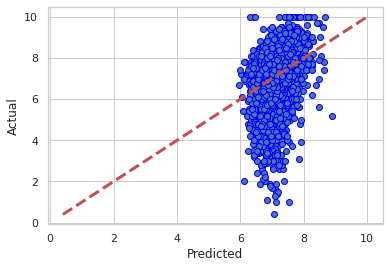

In [ ]:
reg = LinearRegression().fit(X_train, y_train)
y_true = y_test['score'].tolist()
CC = reg.predict(X_test)
y_pred = CC[:,0]
print(r2_score(y_true, CC))
rvalues.append(r2_score(y_true, CC))
mae.append(mean_absolute_error(y_true, CC))
mape.append(mean_absolute_percentage_error(y_true, CC))
names.append("LinearRegression")
graphRegressionMetrics(y_true, CC, X_test)

#  ElasticnEt

0.040179487660894186


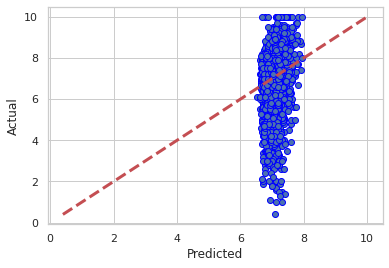

In [ ]:
regr = ElasticNet()
regr.fit(X_train, y_train)
ElasticNet(random_state=0)
CC = regr.predict(X_test)
CC
y_true = y_test['score'].tolist()

print(r2_score(y_true, CC))
rvalues.append(r2_score(y_true, CC))
mae.append(mean_absolute_error(y_true, CC))
mape.append(mean_absolute_percentage_error(y_true, CC))
names.append("ElastcNet")
graphRegressionMetrics(y_true, CC, X_test)

# Ridge

0.0744960045695392


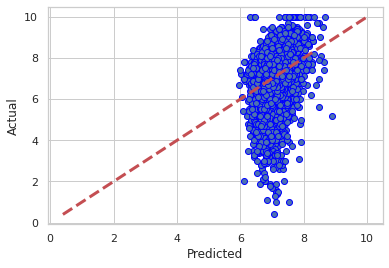

In [ ]:
rr = Ridge(alpha=0.1)
rr.fit(X_train, y_train) 
CC = rr.predict(X_test)
CC
y_true = y_test['score'].tolist()

print(r2_score(y_true, CC))
rvalues.append(r2_score(y_true, CC))
mae.append(mean_absolute_error(y_true, CC))
mape.append(mean_absolute_percentage_error(y_true, CC))
names.append("Ridge")
graphRegressionMetrics(y_true, CC, X_test)

# Lasso

0.07219454240866297


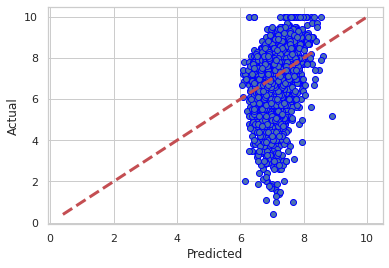

In [ ]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
CC = model_lasso.predict(X_test)
CC
y_true = y_test['score'].tolist()

print(r2_score(y_true, CC))
rvalues.append(r2_score(y_true, CC))
mae.append(mean_absolute_error(y_true, CC))
mape.append(mean_absolute_percentage_error(y_true, CC))
names.append("Lasso")
graphRegressionMetrics(y_true, CC, X_test)

# SGDRegreSSor Deprecated

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.04155563261382045


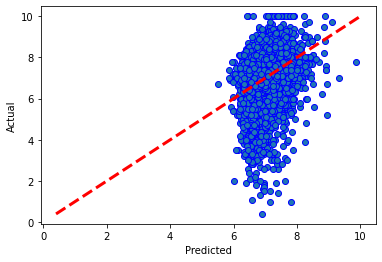

In [ ]:
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)
CC = reg.predict(X_test)
CC
y_true = y_test['score'].tolist()

print(r2_score(y_true, CC))
rvalues.append(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

# NUSVR

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.09798695243986666


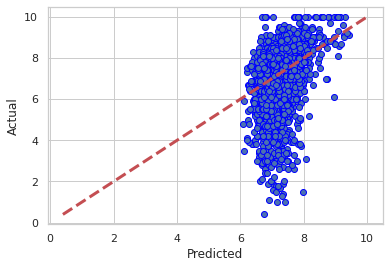

In [ ]:
reg = NuSVR()
reg.fit(X_train, y_train)
CC = reg.predict(X_test)
CC
y_true = y_test['score'].tolist()

print(r2_score(y_true, CC))
rvalues.append(r2_score(y_true, CC))
mae.append(mean_absolute_error(y_true, CC))
mape.append(mean_absolute_percentage_error(y_true, CC))
names.append("NuSVR")
graphRegressionMetrics(y_true, CC, X_test)

# SVR

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.07414233396275371


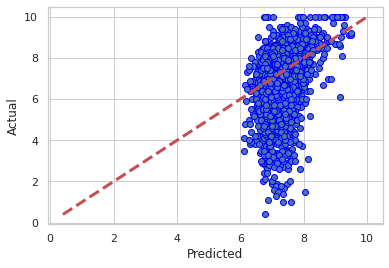

In [ ]:
reg = SVR()
reg.fit(X_train, y_train)
CC = reg.predict(X_test)
CC
y_true = y_test['score'].tolist()

print(r2_score(y_true, CC))
rvalues.append(r2_score(y_true, CC))
mae.append(mean_absolute_error(y_true, CC))
mape.append(mean_absolute_percentage_error(y_true, CC))
names.append("SVR")
graphRegressionMetrics(y_true, CC, X_test)

# DecisionTree

In [ ]:
X_train

,popularity,total_tracks,album_duration_minutes,year,min_loudness,max_loudness,mean_loudness,stddev_loudness,label_frequency,mean_duration,min_valence,max_valence,stddev_valence,mean_valence,weighted_avg_valence,weighted_avg_speechiness,med_liveness,stddev_liveness,stddev_instrumentalness,weighted_avg_instrumentalness,explicit,weighted_avg_energy,min_danceability,max_danceability,mean_danceability,stddev_danceability,mean_acousticness,stddev_acousticness,med_acousticness,min_popularity,max_popularity,mean_popularity,stddev_popularity,key_0_pct,key_1_pct,key_2_pct,key_3_pct,key_4_pct,key_5_pct,key_6_pct,...,sig_5_pct,num_artists,num_features,artist_popularity_mean,artist_followers_mean,artist_popularity_min,artist_popularity_max,artist_followers_min,artist_followers_max,artist_popularity_stddev,artist_followers_stddev,mean_feat_artist_popularity,mean_feat_artist_followers,min_feat_artist_popularity,min_feat_artist_followers,max_feat_artist_popularity,max_feat_artist_followers,stddev_feat_artist_popularity,stddev_feat_artist_followers,genre_0_pct,genre_1_pct,genre_2_pct,genre_3_pct,genre_4_pct,genre_5_pct,genre_6_pct,genre_7_pct,genre_8_pct,genre_9_pct,genre_10_pct,genre_11_pct,genre_12_pct,genre_13_pct,genre_14_pct,genre_15_pct,genre_16_pct,genre_17_pct,genre_18_pct,genre_19_pct,genre_20_pct
0,54,3.738318,4.105792,96.923077,5.863893,82.350712,79.643891,2.034564,0.014599,0.046839,47.40,63.7,15.585053,40.750000,40.915173,21.699596,20.25,13.073507,0.231984,0.082292,100.0,53.077903,28.7,92.9,80.200000,9.041018,12.832000,12.832000,4.615,25,53,35.600000,10.585105,10.000000,30.000000,0.000000,0.0,0.000000,0.000000,20.000000,...,0.000000,0.0,13.461538,61.0,13.278707,61,61,13.278707,13.278707,0.0,0.0,72.0,14.514434,56.0,12.476310,85.0,15.426456,12.349089,2.735681,10.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,10.000000,0.000000,0.000000,0.0,20.000000,0.0,10.000000,0.000000,10.000000,10.000000,30.000000,0.000000,0.000000,0.000000
1,20,5.607477,7.339786,75.384615,10.002577,84.542850,80.211092,3.323124,0.200730,0.058598,79.50,95.5,27.216777,57.471429,57.191151,3.616179,17.75,18.744235,11.664996,4.967174,0.0,63.651187,53.1,73.6,53.585714,14.451929,42.919407,42.919407,42.200,0,22,3.214286,5.507737,14.285714,0.000000,7.142857,0.0,28.571429,0.000000,0.000000,...,0.000000,0.0,3.846154,61.0,12.727850,61,61,12.727850,12.727850,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,14.285714,7.142857,0.0,0.000000,0.0,0.000000,21.428571,0.000000,0.000000,0.0,7.142857,0.0,14.285714,0.000000,7.142857,0.000000,7.142857,0.000000,21.428571,0.000000
2,33,5.607477,6.897728,80.000000,19.973318,84.664130,80.097501,5.519231,0.000000,0.054888,64.60,77.4,21.864534,43.035714,44.122485,27.788855,12.35,14.691043,23.616126,2.632383,100.0,68.467460,58.9,79.6,59.342857,17.980832,14.167007,14.167007,1.655,9,30,17.500000,5.110321,14.285714,28.571429,0.000000,0.0,7.142857,0.000000,7.142857,...,7.142857,0.0,23.076923,62.0,13.339545,62,62,13.339545,13.339545,0.0,0.0,44.9,14.030985,13.0,3.850148,91.0,16.156585,27.444692,2.771780,0.000000,0.000000,28.571429,0.0,0.000000,0.0,0.000000,7.142857,0.000000,0.000000,0.0,0.000000,0.0,0.000000,7.142857,0.000000,0.000000,0.000000,0.000000,57.142857,0.000000
3,22,3.738318,11.174333,87.692308,25.671968,84.147173,72.902385,6.958739,0.018248,0.129887,83.74,88.2,30.570328,40.663000,35.122099,8.522680,13.65,22.565237,28.736465,81.203132,0.0,49.624261,55.6,83.9,59.490000,19.925609,58.600000,58.600000,66.200,5,19,10.200000,4.491968,10.000000,10.000000,0.000000,10.0,30.000000,20.000000,0.000000,...,0.000000,0.0,3.846154,48.0,10.271562,48,48,10.271562,10.271562,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,20.000000,10.000000,0.0,0.000000,0.0,10.000000,0.000000,10.000000,10.000000,0.0,10.000000,0.0,0.000000,10.000000,0.000000,0.000000,10.000000,0.000000,10.000000,0.000000
4,5,6.542056,8.320211,69.230769,21.063323,76.454982,69.173059,5.503591,0.010949,0.057598,60.50,63.5,17.981596,18.796875

-0.7553151480476215


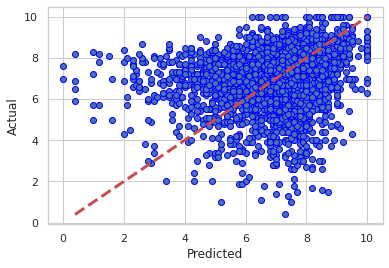

In [ ]:
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
CC = reg.predict(X_test)
CC
y_true = y_test['score'].tolist()

print(r2_score(y_true, CC))
rvalues.append(r2_score(y_true, CC))
mae.append(mean_absolute_error(y_true, CC))
mape.append(mean_absolute_percentage_error(y_true, CC))
names.append("DecisionTreeRegressor")
graphRegressionMetrics(y_true, CC, X_test)

# ExtraTreeRegressor

-0.8082836271460718


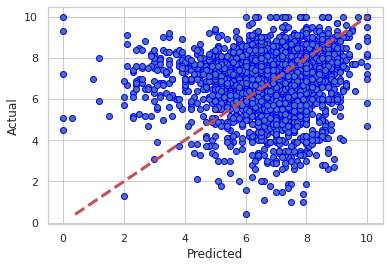

In [ ]:
reg = ExtraTreeRegressor()
reg.fit(X_train, y_train)
CC = reg.predict(X_test)
CC
y_true = y_test['score'].tolist()

print(r2_score(y_true, CC))
rvalues.append(r2_score(y_true, CC))
mae.append(mean_absolute_error(y_true, CC))
mape.append(mean_absolute_percentage_error(y_true, CC))
names.append("ExtraTreeRegressor")
graphRegressionMetrics(y_true, CC, X_test)

# GaussianPRocessRegressor BROKEN

In [ ]:
kernel = DotProduct() + WhiteKernel()
reg = GaussianProcessRegressor(kernel=kernel)

reg.fit(X_train, Y_train)
CC = reg.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

LinAlgError: ignored

# PoissonRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:287: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


0.06703541041610728


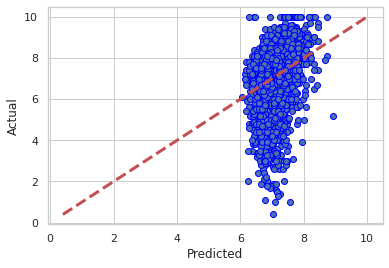

In [ ]:
reg = PoissonRegressor()

reg.fit(X_train, y_train)
CC = reg.predict(X_test)
CC
y_true = y_test['score'].tolist()

print(r2_score(y_true, CC))
rvalues.append(r2_score(y_true, CC))
mae.append(mean_absolute_error(y_true, CC))
mape.append(mean_absolute_percentage_error(y_true, CC))
names.append("PoissonRegressor")
graphRegressionMetrics(y_true, CC, X_test)

# TweedRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:287: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


0.06639225075468291


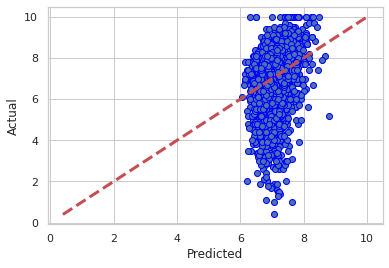

In [ ]:
reg = TweedieRegressor()

reg.fit(X_train, y_train)
CC = reg.predict(X_test)
CC
y_true = y_test['score'].tolist()

print(r2_score(y_true, CC))
rvalues.append(r2_score(y_true, CC))
mae.append(mean_absolute_error(y_true, CC))
mape.append(mean_absolute_percentage_error(y_true, CC))
names.append("TweedRegressor")
graphRegressionMetrics(y_true, CC, X_test)

Graph Metrics

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [ ]:
def graphRegressionMetrics(Y_test, Y_pred, X_test):
  fig, ax = plt.subplots()
  ax.scatter(Y_pred, Y_test, edgecolors=(0, 0, 1))
  Y_test = np.array(Y_test)
  ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=3)
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Actual')
  plt.show()

## Feature Minimizing 

PCA

Error in callback <bound method _WandbInit._resume_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7fb8ac59cfd0>> (for pre_run_cell):


Exception: ignored

1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

0.7771656528722342
##############################
##############################
2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

0.8753972953566259
##############################
##############################
3


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

0.9331156097644432
##############################
##############################
4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

0.9709375956946011
##############################
##############################
5


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

0.9918495344433117
##############################
##############################
6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

0.9987951929242945
##############################
##############################
7


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

0.9999112280356864
##############################
##############################
8


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

0.9999995467686138
##############################
##############################


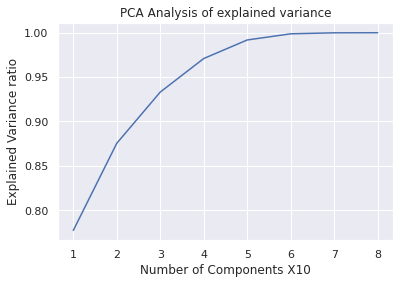

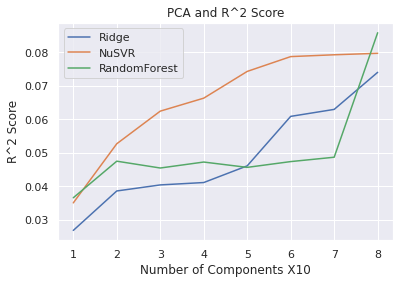

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7fb8ac59cfd0>> (for post_run_cell):


Exception: ignored

In [ ]:
sum = []
scoreridge = []
scoreNu = []
rf = RandomForestRegressor()
param_grid = {'n_estimators': [47],
              "max_depth": [6],
              "max_features" : ['auto'],
              "min_samples_split" : [15],
              "min_samples_leaf" : [13]}


search = HalvingGridSearchCV(rf, param_grid, random_state=42)
scorerf = []
for i in range(1, 9) :
  print(i)
  j = i * 10
  pca = PCA(n_components=j)
  pca_ = pca.fit_transform(the_real_one)
  pca.explained_variance_ratio_
  sum1 = np.sum(pca.explained_variance_ratio_)
  X_train, X_test, y_train, y_test = train_test_split(pca_, y_full, test_size=0.25, random_state=22)
  rr = Ridge(alpha=0.0001)
  rr.fit(X_train, y_train) 
  CC = rr.predict(X_test)
  CC
  y_true = y_test['score'].tolist()
  scoreridge.append(r2_score(y_true, CC))


  reg = NuSVR()
  reg.fit(X_train, y_train)
  CC = reg.predict(X_test)
  CC
  y_true = y_test['score'].tolist()
  scoreNu.append(r2_score(y_true, CC))


  search.fit(X_train, y_train)
  CC = search.predict(X_test)
  CC
  y_true = y_test['score'].tolist()
  scorerf.append(r2_score(y_true, CC))

  #print(r2_score(y_true, CC))
  #score.append(r2_score(y_true, CC))
  #print(r2_score(y_true, CC))
  sum.append(sum1)
  print(sum1)
  print("##############################")
  print("##############################")


plt.figure(0)
sns.set()
plt.title("PCA Analysis of explained variance")
plt.xlabel("Number of Components X10")
plt.ylabel("Explained Variance ratio")
plt.plot(range(1, 9), sum)
plt.savefig('PCAExplainedVariance.png')


plt.figure(1)
sns.set()
plt.title("PCA and R^2 Score")
plt.xlabel("Number of Components X10")
plt.ylabel("R^2 Score")
plt.plot(range(1, 9), scoreridge)
plt.plot(range(1, 9), scoreNu)
plt.plot(range(1, 9), scorerf)
plt.legend(['Ridge', 'NuSVR', 'RandomForest'])
plt.savefig('PCAVSmodels.png')

KMeans

1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[2.50000000e+01 1.00000000e+00 0.00000000e+00 ... 1.80000000e+01
  6.28971557e+00 6.28971557e+00]
 [6.90000000e+01 1.00000000e+00 3.64963504e-03 ... 6.90000000e+01
  1.19905686e+01 1.19905686e+01]
 [4.40000000e+01 1.00000000e+00 7.29927007e-02 ... 5.00000000e+01
  9.70832389e+00 9.70832389e+00]
 ...
 [5.70000000e+01 6.61538462e-01 3.72262774e-01 ... 5.60000000e+01
  1.22798899e+01 1.22798899e+01]
 [5.00000000e+00 6.61538462e-01 1.09489051e-02 ... 1.70000000e+01
  7.82003799e+00 7.82003799e+00]
 [3.80000000e+01 6.61538462e-01 1.00000000e+00 ... 4.40000000e+01
  1.13092781e+01 1.13092781e+01]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

0.08808753389746049
##############################
##############################
2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[2.50000000e+01 5.04481193e-02 1.00000000e+00 ... 1.80000000e+01
  6.28971557e+00 6.28971557e+00]
 [6.90000000e+01 7.35041134e-02 1.00000000e+00 ... 6.90000000e+01
  1.19905686e+01 1.19905686e+01]
 [4.40000000e+01 3.10125109e-01 1.00000000e+00 ... 5.00000000e+01
  9.70832389e+00 9.70832389e+00]
 ...
 [5.70000000e+01 6.39826686e-02 6.61538462e-01 ... 5.60000000e+01
  1.22798899e+01 1.22798899e+01]
 [5.00000000e+00 6.07860639e-02 6.61538462e-01 ... 1.70000000e+01
  7.82003799e+00 7.82003799e+00]
 [3.80000000e+01 6.63028010e-02 6.61538462e-01 ... 4.40000000e+01
  1.13092781e+01 1.13092781e+01]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

0.10077796244837078
##############################
##############################
3


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[2.50000000e+01 3.73831776e-02 5.04481193e-02 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+01]
 [6.90000000e+01 7.00934579e-02 7.35041134e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.40000000e+01 2.33644860e-01 3.10125109e-01 ... 1.92307692e+00
  3.84615385e+00 1.92307692e+00]
 ...
 [5.70000000e+01 3.73831776e-02 6.39826686e-02 ... 2.00000000e+01
  1.00000000e+01 0.00000000e+00]
 [5.00000000e+00 4.67289720e-02 6.07860639e-02 ... 0.00000000e+00
  8.33333333e+00 0.00000000e+00]
 [3.80000000e+01 6.07476636e-02 6.63028010e-02 ... 2.00000000e+01
  6.66666667e+00 0.00000000e+00]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

0.10104303829806194
##############################
##############################
4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[2.50000000e+01 3.73831776e-02 5.04481193e-02 ... 0.00000000e+00
  1.00000000e+01 0.00000000e+00]
 [6.90000000e+01 7.00934579e-02 7.35041134e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.40000000e+01 2.33644860e-01 3.10125109e-01 ... 3.84615385e+00
  1.92307692e+00 9.61538462e+00]
 ...
 [5.70000000e+01 3.73831776e-02 6.39826686e-02 ... 1.00000000e+01
  0.00000000e+00 0.00000000e+00]
 [5.00000000e+00 4.67289720e-02 6.07860639e-02 ... 8.33333333e+00
  0.00000000e+00 0.00000000e+00]
 [3.80000000e+01 6.07476636e-02 6.63028010e-02 ... 6.66666667e+00
  0.00000000e+00 0.00000000e+00]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

0.10092550304473702
##############################
##############################
5


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[2.50000000e+01 3.73831776e-02 5.04481193e-02 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+01]
 [6.90000000e+01 7.00934579e-02 7.35041134e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.40000000e+01 2.33644860e-01 3.10125109e-01 ... 1.92307692e+00
  3.84615385e+00 1.92307692e+00]
 ...
 [5.70000000e+01 3.73831776e-02 6.39826686e-02 ... 2.00000000e+01
  1.00000000e+01 0.00000000e+00]
 [5.00000000e+00 4.67289720e-02 6.07860639e-02 ... 0.00000000e+00
  8.33333333e+00 0.00000000e+00]
 [3.80000000e+01 6.07476636e-02 6.63028010e-02 ... 2.00000000e+01
  6.66666667e+00 0.00000000e+00]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

0.10166840234650709
##############################
##############################
6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[2.50000000e+01 3.73831776e-02 5.04481193e-02 ... 0.00000000e+00
  1.00000000e+01 0.00000000e+00]
 [6.90000000e+01 7.00934579e-02 7.35041134e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.40000000e+01 2.33644860e-01 3.10125109e-01 ... 3.84615385e+00
  1.92307692e+00 9.61538462e+00]
 ...
 [5.70000000e+01 3.73831776e-02 6.39826686e-02 ... 1.00000000e+01
  0.00000000e+00 0.00000000e+00]
 [5.00000000e+00 4.67289720e-02 6.07860639e-02 ... 8.33333333e+00
  0.00000000e+00 0.00000000e+00]
 [3.80000000e+01 6.07476636e-02 6.63028010e-02 ... 6.66666667e+00
  0.00000000e+00 0.00000000e+00]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

0.10521481430485224
##############################
##############################
7


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[2.50000000e+01 3.73831776e-02 5.04481193e-02 ... 0.00000000e+00
  1.00000000e+01 0.00000000e+00]
 [6.90000000e+01 7.00934579e-02 7.35041134e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.40000000e+01 2.33644860e-01 3.10125109e-01 ... 7.69230769e+00
  1.92307692e+00 9.61538462e+00]
 ...
 [5.70000000e+01 3.73831776e-02 6.39826686e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.00000000e+00 4.67289720e-02 6.07860639e-02 ... 1.66666667e+01
  0.00000000e+00 0.00000000e+00]
 [3.80000000e+01 6.07476636e-02 6.63028010e-02 ... 1.33333333e+01
  0.00000000e+00 0.00000000e+00]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

0.10419980448106259
##############################
##############################
8


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[2.50000000e+01 3.73831776e-02 5.04481193e-02 ... 0.00000000e+00
  1.00000000e+01 0.00000000e+00]
 [6.90000000e+01 7.00934579e-02 7.35041134e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.40000000e+01 2.33644860e-01 3.10125109e-01 ... 3.84615385e+00
  1.92307692e+00 9.61538462e+00]
 ...
 [5.70000000e+01 3.73831776e-02 6.39826686e-02 ... 1.00000000e+01
  0.00000000e+00 0.00000000e+00]
 [5.00000000e+00 4.67289720e-02 6.07860639e-02 ... 8.33333333e+00
  0.00000000e+00 0.00000000e+00]
 [3.80000000e+01 6.07476636e-02 6.63028010e-02 ... 6.66666667e+00
  0.00000000e+00 0.00000000e+00]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

0.10058469169333817
##############################
##############################


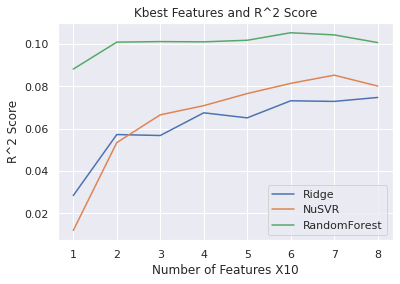

In [ ]:
scoreridge = []
scoreNu = []
rf = RandomForestRegressor()
param_grid = {'n_estimators': [47],
              "max_depth": [6],
              "max_features" : ['auto'],
              "min_samples_split" : [15],
              "min_samples_leaf" : [13]}


search = HalvingGridSearchCV(rf, param_grid, random_state=42)
scorerf = []
for i in range(1,9) :
  print(i)
  j = i * 10
  X_new = SelectKBest(mutual_info_regression, k=j).fit_transform(the_real_one, y_full)
  print(X_new)
  X_train, X_test, y_train, y_test = train_test_split(X_new, y_full, test_size=0.25, random_state=22)
  rr = Ridge(alpha=0.0001)
  rr.fit(X_train, y_train) 
  CC = rr.predict(X_test)
  CC
  y_true = y_test['score'].tolist()
  scoreridge.append(r2_score(y_true, CC))

  reg = NuSVR()
  reg.fit(X_train, y_train)
  CC = reg.predict(X_test)
  CC
  y_true = y_test['score'].tolist()
  scoreNu.append(r2_score(y_true, CC))

  search.fit(X_train, y_train)
  CC = search.predict(X_test)
  CC
  y_true = y_test['score'].tolist()
  scorerf.append(r2_score(y_true, CC))
  #print(r2_score(y_true, CC))
  
  print(r2_score(y_true, CC))
  print("##############################")
  print("##############################")


plt.figure(0)
sns.set()
plt.title("Kbest Features and R^2 Score")
plt.xlabel("Number of Features X10")
plt.ylabel("R^2 Score")
plt.plot(range(1, 9), scoreridge)
plt.plot(range(1, 9), scoreNu)
plt.plot(range(1, 9), scorerf)
plt.legend(['Ridge', 'NuSVR', 'RandomForest'])
plt.savefig('KbestVSmodels.png')

In [ ]:
X_new = SelectKBest(mutual_info_regression, k=2).fit_transform(the_real_one, y_full)
X_new

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([[7.5, 3. ],
       [7.7, 4. ],
       [6.5, 1. ],
       ...,
       [9.3, 5. ],
       [8.1, 5. ],
       [7.4, 3. ]])

In [ ]:
X_new

array([[7.50000e+00, 2.02100e+03, 5.38000e+02, 5.38000e+02, 7.00000e+00],
       [7.70000e+00, 2.02100e+03, 1.61226e+05, 1.61226e+05, 8.00000e+00],
       [6.50000e+00, 2.02100e+03, 1.64530e+04, 1.64530e+04, 6.00000e+00],
       ...,
       [9.30000e+00, 1.99900e+03, 2.15321e+05, 2.15321e+05, 9.00000e+00],
       [8.10000e+00, 1.99900e+03, 2.48900e+03, 2.48900e+03, 8.00000e+00],
       [7.40000e+00, 1.99900e+03, 8.15740e+04, 8.15740e+04, 7.00000e+00]])

ICA

Error in callback <bound method _WandbInit._resume_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7fb8ac59cfd0>> (for pre_run_cell):


Exception: ignored

1


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estima

0.03781343957113781
##############################
##############################
2


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

0.04647365953690308
##############################
##############################
3


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

0.04492302565445838
##############################
##############################
4


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

0.040625952343753546
##############################
##############################
5


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

0.04248409343415804
##############################
##############################
6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

0.0606283943252397
##############################
##############################
7


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

0.05790457191977039
##############################
##############################
8


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

0.08817786167526886
##############################
##############################


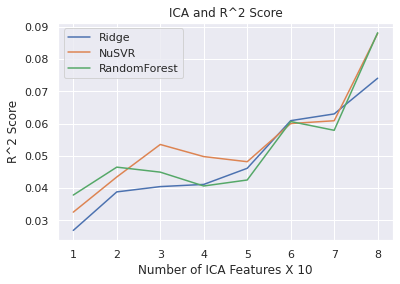

Error in callback <bound method _WandbInit._pause_backend of <wandb.sdk.wandb_init._WandbInit object at 0x7fb8ac59cfd0>> (for post_run_cell):


Exception: ignored

In [ ]:

scoreridge = []
scoreNu = []
rf = RandomForestRegressor()
param_grid = {'n_estimators': [47],
              "max_depth": [6],
              "max_features" : ['auto'],
              "min_samples_split" : [15],
              "min_samples_leaf" : [13]}


search = HalvingGridSearchCV(rf, param_grid, random_state=42)
scorerf = []
for i in range(1,9) :
  print(i)
  j = i * 10
  ica = FastICA(n_components=j)
  S_ica_ = ica.fit_transform(the_real_one)
  X_train, X_test, y_train, y_test = train_test_split(S_ica_, y_full, test_size=0.25, random_state=22)
  rr = Ridge(alpha=0.0001)
  rr.fit(X_train, y_train) 
  CC = rr.predict(X_test)
  CC
  y_true = y_test['score'].tolist()
  scoreridge.append(r2_score(y_true, CC))

  reg = NuSVR()
  reg.fit(X_train, y_train)
  CC = reg.predict(X_test)
  CC
  y_true = y_test['score'].tolist()
  scoreNu.append(r2_score(y_true, CC))


  search.fit(X_train, y_train)
  CC = search.predict(X_test)
  CC
  y_true = y_test['score'].tolist()
  scorerf.append(r2_score(y_true, CC))

  #print(r2_score(y_true, CC))
  
  print(r2_score(y_true, CC))
  print("##############################")
  print("##############################")


plt.figure(0)
sns.set()
plt.title("ICA and R^2 Score")
plt.xlabel("Number of ICA Features X 10")
plt.ylabel("R^2 Score")
plt.plot(range(1, 9), scoreridge)
plt.plot(range(1, 9), scoreNu)
plt.plot(range(1, 9), scorerf)
plt.legend(['Ridge', 'NuSVR', 'RandomForest'])
plt.savefig('ICAVSmodels.png')

Testing n Graphin

In [ ]:

#change this based on if you wanna do ICA, PCA, K means
ica = FastICA(n_components=90)
S_ica_ = ica.fit_transform(the_real_one_real) 
#####################################
X_train, X_test, y_train, y_test = train_test_split(X_new, y_full, test_size=0.25, random_state=22)

feature_names = list(the_real_one_real.columns)
ax = plt.axes()
ax.figure.set_size_inches(30, 30)
im = ax.imshow(np.corrcoef(X_train.T), cmap="RdBu_r", vmin=-1, vmax=1)

ax.set_xticks(range(0,90))
ax.set_xticklabels(feature_names, rotation=90)
ax.set_yticks(range(0,90))
ax.set_yticklabels(feature_names)
plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Pitchfork feature correlation matrix")





reg = LinearRegression().fit(X_train, Y_train)
y_true = Y_test['score'].tolist()
CC = reg.predict(X_test)
y_pred = CC[:,0]
print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

regr = ElasticNet()
regr.fit(X_train, Y_train)
ElasticNet(random_state=0)
CC = regr.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

rr = Ridge(alpha=0.0001)
rr.fit(X_train, Y_train) 
CC = rr.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, Y_train) 
CC = model_lasso.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, Y_train)
CC = reg.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

reg = NuSVR()
reg.fit(X_train, Y_train)
CC = reg.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

reg = SVR()
reg.fit(X_train, Y_train)
CC = reg.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

reg = DecisionTreeRegressor()
reg.fit(X_train, Y_train)
CC = reg.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

reg = ExtraTreeRegressor()
reg.fit(X_train, Y_train)
CC = reg.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

reg = PoissonRegressor()

reg.fit(X_train, Y_train)
CC = reg.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

reg = TweedieRegressor()

reg.fit(X_train, Y_train)
CC = reg.predict(X_test)
CC
y_true = Y_test['score'].tolist()

print(r2_score(y_true, CC))
graphRegressionMetrics(y_true, CC, X_test)

## Creating FIgures for DA papee

In [ ]:
!pip install wandb -qq
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
import wandb
wandb.init(project="sklearn")

In [ ]:
print(X_train.shape)
print(y_train.squeeze().shape)
print(X_test.shape)
print(y_test.shape)

(12331, 90)
(12331,)
(4111, 90)
(4111, 1)


In [ ]:
wandb.sklearn.plot_regressor(search, X_train, X_test, y_train.squeeze(), y_test.squeeze())
wandb.init(project="sklearn")
ica = FastICA(n_components=77)
S_ica_ = ica.fit_transform(the_real_one)
X_train, X_test, y_train, y_test = train_test_split(S_ica_, y_full, test_size=0.25, random_state=22)
# Train model, get predictions
rf = RandomForestRegressor()
param_grid = {'n_estimators': [47],
              "max_depth": [6],
              "max_features" : ['auto'],
              "min_samples_split" : [15],
              "min_samples_leaf" : [13]}
search = HalvingGridSearchCV(rf, param_grid, random_state=42)
search.fit(X_train, y_train)
y_pred = search.predict(X_test)
#reg = NuSVR()
#reg.fit(X_train, y_train)
#y_pred = reg.predict(X_test)
# Visualize all regression plots
wandb.sklearn.plot_regressor(search, X_train, X_test, y_train.squeeze(), y_test.squeeze())
wandb.init(project="sklearn")
pca = PCA(n_components=77)
pca_ = pca.fit_transform(the_real_one)
X_train, X_test, y_train, y_test = train_test_split(pca_, y_full, test_size=0.25, random_state=22)
# Train model, get predictions
rf = RandomForestRegressor()
param_grid = {'n_estimators': [47],
              "max_depth": [6],
              "max_features" : ['auto'],
              "min_samples_split" : [15],
              "min_samples_leaf" : [13]}
search = HalvingGridSearchCV(rf, param_grid, random_state=42)
search.fit(X_train, y_train)
y_pred = search.predict(X_test)
#reg = NuSVR()
#reg.fit(X_train, y_train)
#y_pred = reg.predict(X_test)
# Visualize all regression plots
wandb.sklearn.plot_regressor(search, X_train, X_test, y_train.squeeze(), y_test.squeeze())

_runtime,249
_timestamp,1622670623
_step,3


_runtime,▁▆▇█
_timestamp,▁▆▇█
_step,▁▃▆█


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[2.50000000e+01 3.73831776e-02 5.04481193e-02 ... 1.00000000e+01
  1.00000000e+01 0.00000000e+00]
 [6.90000000e+01 7.00934579e-02 7.35041134e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.40000000e+01 2.33644860e-01 3.10125109e-01 ... 3.84615385e+00
  1.92307692e+00 9.61538462e+00]
 ...
 [5.70000000e+01 3.73831776e-02 6.39826686e-02 ... 1.00000000e+01
  0.00000000e+00 0.00000000e+00]
 [5.00000000e+00 4.67289720e-02 6.07860639e-02 ... 1.66666667e+01
  0.00000000e+00 0.00000000e+00]
 [3.80000000e+01 6.07476636e-02 6.63028010e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 

_runtime,528
_timestamp,1622671163
_step,3


_runtime,▁▇██
_timestamp,▁▇██
_step,▁▃▆█


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 

_runtime,1136
_timestamp,1622672303
_step,3


_runtime,▁▇██
_timestamp,▁▇██
_step,▁▃▆█


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 

In [ ]:
r2scoresAfter = []
names = []


# Train model, get predictions
rf = RandomForestRegressor()
param_grid = {'n_estimators': [47],
              "max_depth": [6],
              "max_features" : ['auto'],
              "min_samples_split" : [15],
              "min_samples_leaf" : [13]}


search = HalvingGridSearchCV(rf, param_grid, random_state=42)
X_new = SelectKBest(mutual_info_regression, k=60).fit_transform(the_real_one, y_full)
print(X_new)
X_train, X_test, y_train, y_test = train_test_split(X_new, y_full, test_size=0.25, random_state=22)
search.fit(X_train, y_train)
CC = search.predict(X_test)
y_true = y_test['score'].tolist()
r2scoresAfter.append(r2_score(y_true, CC))
names.append("RFKbest")

reg = NuSVR()
reg.fit(X_train, y_train)
CC = reg.predict(X_test)
CC
y_true = y_test['score'].tolist()
r2scoresAfter.append(r2_score(y_true, CC))
names.append("NuSVRKbest")

reg = Ridge()
reg.fit(X_train, y_train)
CC = reg.predict(X_test)
CC
y_true = y_test['score'].tolist()
r2scoresAfter.append(r2_score(y_true, CC))
names.append("RidgeKbest")

ica = FastICA(n_components=77)
S_ica_ = ica.fit_transform(the_real_one)
X_train, X_test, y_train, y_test = train_test_split(S_ica_, y_full, test_size=0.25, random_state=22)
# Train model, get predictions
rf = RandomForestRegressor()
param_grid = {'n_estimators': [47],
              "max_depth": [6],
              "max_features" : ['auto'],
              "min_samples_split" : [15],
              "min_samples_leaf" : [13]}


search = HalvingGridSearchCV(rf, param_grid, random_state=42)
search.fit(X_train, y_train)
CC = search.predict(X_test)
y_true = y_test['score'].tolist()
r2scoresAfter.append(r2_score(y_true, CC))
names.append("RFICA")

reg = NuSVR()
reg.fit(X_train, y_train)
CC = reg.predict(X_test)
CC
y_true = y_test['score'].tolist()
r2scoresAfter.append(r2_score(y_true, CC))
names.append("NuSVRICA")

reg = Ridge()
reg.fit(X_train, y_train)
CC = reg.predict(X_test)
CC
y_true = y_test['score'].tolist()
r2scoresAfter.append(r2_score(y_true, CC))
names.append("RidgeICA")

pca = PCA(n_components=77)
pca_ = pca.fit_transform(the_real_one)
X_train, X_test, y_train, y_test = train_test_split(pca_, y_full, test_size=0.25, random_state=22)
# Train model, get predictions
rf = RandomForestRegressor()
param_grid = {'n_estimators': [47],
              "max_depth": [6],
              "max_features" : ['auto'],
              "min_samples_split" : [15],
              "min_samples_leaf" : [13]}


search = HalvingGridSearchCV(rf, param_grid, random_state=42)
search.fit(X_train, y_train)
CC = search.predict(X_test)
y_true = y_test['score'].tolist()
r2scoresAfter.append(r2_score(y_true, CC))
names.append("RFPCA")

reg = NuSVR()
reg.fit(X_train, y_train)
CC = reg.predict(X_test)
CC
y_true = y_test['score'].tolist()
r2scoresAfter.append(r2_score(y_true, CC))
names.append("NuSVRPCA")

reg = Ridge()
reg.fit(X_train, y_train)
CC = reg.predict(X_test)
CC
y_true = y_test['score'].tolist()
r2scoresAfter.append(r2_score(y_true, CC))
names.append("RidgePCA")


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[[2.50000000e+01 3.73831776e-02 5.04481193e-02 ... 0.00000000e+00
  1.00000000e+01 0.00000000e+00]
 [6.90000000e+01 7.00934579e-02 7.35041134e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.40000000e+01 2.33644860e-01 3.10125109e-01 ... 3.84615385e+00
  1.92307692e+00 9.61538462e+00]
 ...
 [5.70000000e+01 3.73831776e-02 6.39826686e-02 ... 1.00000000e+01
  0.00000000e+00 0.00000000e+00]
 [5.00000000e+00 4.67289720e-02 6.07860639e-02 ... 8.33333333e+00
  0.00000000e+00 0.00000000e+00]
 [3.80000000e+01 6.07476636e-02 6.63028010e-02 ... 6.66666667e+00
  0.00000000e+00 0.00000000e+00]]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 

In [ ]:
wandb.init(project="sklearn")
model = SelectKBest()
wandb.sklearn.plot_elbow_curve(model, X_train)

NameError: ignored

In [ ]:
wandb.sklearn.plot_regressor(reg, X_train, X_test, y_train, y_test, model_name='Ridge')
wandb.sklearn.plot_summary_metrics(reg, X_train, X_test, y_train, y_test)

ValueError: ignored

Ensemble Shiz

In [ ]:
import numpy as np 
import sklearn as sk
from sklearn import datasets
from sklearn import metrics
from sklearn import svm
from sklearn import linear_model
from sklearn import cluster
from sklearn import model_selection
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ARDRegression
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVR, SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.linear_model import TweedieRegressor, PoissonRegressor, GammaRegressor
from sklearn.model_selection import validation_curve
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.decomposition import FastICA

In [ ]:
rf = RandomForestRegressor()
param_grid = {'n_estimators': [47],
              "max_depth": [6],
              "max_features" : ['auto'],
              "min_samples_split" : [15],
              "min_samples_leaf" : [13]}


search = HalvingGridSearchCV(rf, param_grid, random_state=42)
search.fit(X_train, y_train)
y_pred = search.predict(X_test)


rvalues.append(r2_score(y_true, CC))
mae.append(mean_absolute_error(y_true, CC))
mape.append(mean_absolute_percentage_error(y_true, CC))
names.append("RandomForestRegressor")
# Visualize all regression plots

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 

In [ ]:
print(rvalues)
print(mae)
print(mape)
print(names)
print(len(rvalues))
print(len(mae))
print(len(mape))
print(len(names))

[0.07449193625313755, 0.040179487660894186, 0.0744960045695392, 0.07219454240866297, 0.09798695243986666, 0.07414233396275371, -0.7553151480476215, -0.8082836271460718, 0.06703541041610728, 0.06639225075468291, 0.06639225075468291]
[0.8617826580324999, 0.8719773818428059, 0.8617748767734641, 0.8604941291792909, 0.8199485267243471, 0.8205549506111469, 1.1837022622233033, 1.1975918268061299, 0.8622605258816143, 0.8618734189334644, 0.8618734189334644]
[0.159354657860814, 0.16129325644553055, 0.15935369414123554, 0.1593235124010905, 0.15609246909762997, 0.1578410554507373, 0.20455329880743192, 0.20547852788302517, 0.15949138139032534, 0.1595471356077582, 0.1595471356077582]
['LinearRegression', 'ElastcNet', 'Ridge', 'Lasso', 'NuSVR', 'SVR', 'DecisionTreeRegressor', 'ExtraTreeRegressor', 'PoissonRegressor', 'TweedRegressor', 'RandomForestRegressor']
11
11
11
11


In [ ]:
print(rvalues)
print(names)
res = {}
for key in names:
    for value in r2scoresAfter:
        res[key] = value
        r2scoresAfter.remove(value)
        break  


print(res)

[]
['RFKbest', 'NuSVRKbest', 'RidgeKbest', 'RFICA', 'NuSVRICA', 'RidgeICA', 'RFPCA', 'NuSVRPCA', 'RidgePCA']
{'RFKbest': 0.10226284157195487, 'NuSVRKbest': 0.08361253441799732, 'RidgeKbest': 0.07143518823576112, 'RFICA': 0.06729270092505157, 'NuSVRICA': 0.06679533390043757, 'RidgeICA': 0.04534421699873781, 'RFPCA': 0.04858945765908551, 'NuSVRPCA': 0.07969604333518421, 'RidgePCA': 0.06501707926282263}


In [ ]:
sorted_dict = {}
sorted_keys = sorted(res, key=res.get)  # [1, 3, 2]

for w in sorted_keys:
    sorted_dict[w] = res[w]

print(sorted_dict)

{'RidgeICA': 0.04534421699873781, 'RFPCA': 0.04858945765908551, 'RidgePCA': 0.06501707926282263, 'NuSVRICA': 0.06679533390043757, 'RFICA': 0.06729270092505157, 'RidgeKbest': 0.07143518823576112, 'NuSVRPCA': 0.07969604333518421, 'NuSVRKbest': 0.08361253441799732, 'RFKbest': 0.10226284157195487}


In [ ]:
rvalues_sorted = []
names_sorted = []
for key, value in sorted_dict.items():
    temp = [key,value]
    names_sorted.append(key)
    rvalues_sorted.append(value)

9
9


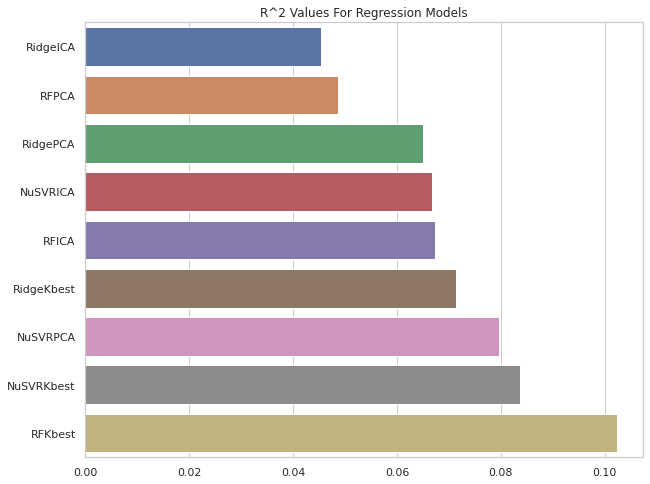

In [ ]:
print(len(rvalues_sorted))
print(len(names_sorted))
import seaborn as sns
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10,8))
ax = sns.barplot(x=rvalues_sorted, y=names_sorted)
ax.set_title("R^2 Values For Regression Models")
ax.figure.savefig('comparingREGmodels_REAL_BIG.png')